In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from brate_trainer_mlp_lstm import * 

In [3]:
PARAMETERS = {
         'model_save_num': 201,
         'output_file_name': 'modFeat3_model_parameters_results.csv',
         'aggr_wind_size': '12', # options ['2', '4', '8']
         'horz_wind_size': '2',
         'pred_var': 'brate', # options ['brate', 'nseg']
         'model_type': 'mlp', # options ['lstm', 'mlp', 'naive_bayes'] 
         'remove_ran_features': False,
         'remove_dash_features': False,
         'remove_prev_brate_val': False,
         #---------
         'num_layers': 2,
         'epochs': 1000,
         'batch_size': 32,
         'rand_seed': 13,
         'classification': True,
         'metrics': 'categorical_accuracy', #'kullback_leibler_divergence'
         'loss': 'categorical_crossentropy',   #'kl_divergence'
         'cross_validate': False,
         'normalize': True,
         'device': 'cpu', # 'cpu'
         #---------
         'train_size': 0,
         'test_size': 0,
         'runtime': 0,
         'accuracy': 0,
         'roc_auc': 0,
         'f1score': 0
        }
tune_hyperparam = False

START
2 12
CSV logger output:  ../models/mlp/modFeat3_model_parameters_results.csv
608/608 [==============================] - 0s 295us/step - loss: 0.2974 - categorical_accuracy: 0.8793
INFO:tensorflow:Assets written to: ../models/mlp/model201/assets
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 96        
Total params: 891
Trainable params: 891
Non-trainable params: 0
_________________________________________________________________
None
acc, roc_auc, f1score:  0.8721653725510361 0.9891042897254283 0.8718326784768511
[[0.88940305 0.07080056 0.01480796 0.02082369 0.004

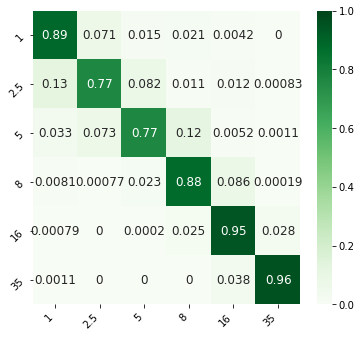

Runtime: 1173.3554856777191 seconds


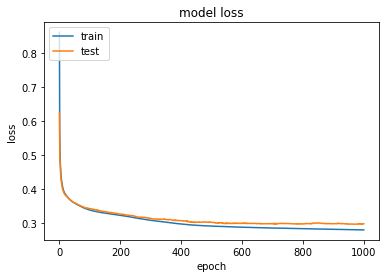

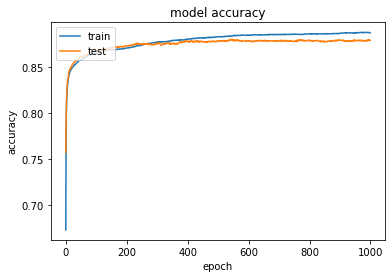

DONE


In [5]:
parameters = PARAMETERS.copy()
feature_comb = [[False, False, False]] # All features
                #[True, False, False],# Only DASH features
                #[False, False, True]] # Last segment history removed 
model_types = ['mlp']   
aggr_wind_size = ['12'] # [4,8,12,16,20,24]
horz_wind_size = ['2']
print('START')
for hw in horz_wind_size:
    for aw in aggr_wind_size:
        train_data_dir = '../data/data_train/dataset7-' \
                                    + hw + 'sWsize-' \
                                    + aw + 'aggsize/'
        print(hw, aw)
        for model_type in model_types:
            n = PARAMETERS['model_save_num']
            for feats in feature_comb:
                parameters['remove_ran_features'] = feats[0]
                parameters['remove_dash_features']= feats[1]
                parameters['remove_prev_brate_val']= feats[2]
                parameters['pred_var'] = 'brate' 
                parameters['model_type'] = model_type
                parameters['model_save_num'] = n
                parameters['aggr_wind_size'] = aw
                parameters['horz_wind_size'] = hw

                model_save_path = '../models/'+ parameters['model_type']+'/model' + str(parameters['model_save_num']) + '/'  
                n=n+1
                train_mlp_lstm(parameters, train_data_dir, model_save_path, tune_hyperparam)
print("DONE")

In [37]:
loaded_model = load_model('../models/lstm/model0') 
#loaded_model.predict()

In [ ]:
loaded_model.predict()